In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
df1= pd.read_csv('train.csv')
x_train=df1.iloc[:,:-1]
y_train=df1.iloc[:,-1]

In [45]:
df1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [46]:
df2=pd.read_csv('test.csv')

In [47]:
x_test=df2.iloc[:,:-1]
y_test=df2.iloc[:,-1]

In [48]:
df1.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [49]:
df2.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [50]:
activity_counts=df1['Activity'].value_counts()

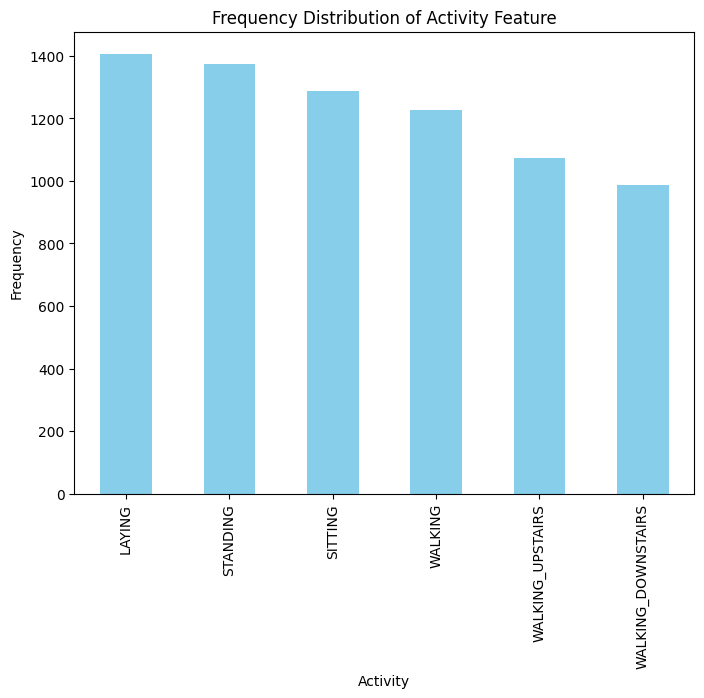

In [51]:
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Activity Feature')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logistic_model=LogisticRegression()

In [54]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
train_prediction=logistic_model.predict(x_train)

In [56]:
test_prediction=logistic_model.predict(x_test)

In [57]:
train_prediction

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_train,train_prediction)

0.9884385201305768

In [60]:
accuracy_score(y_test,test_prediction)

0.9521547336274178

In [61]:
logistic_model.predict_proba(x_train)

array([[2.06750954e-06, 7.69122518e-05, 9.99921020e-01, 2.16089282e-24,
        4.13232350e-25, 2.71654012e-25],
       [1.23241648e-06, 2.02217141e-03, 9.97976596e-01, 1.05094574e-22,
        1.40450051e-24, 3.03302468e-25],
       [4.63251844e-07, 9.92259074e-05, 9.99900311e-01, 3.55108199e-22,
        8.36545811e-25, 1.39590057e-25],
       ...,
       [3.13964856e-17, 7.66062582e-16, 3.66840204e-16, 1.42250718e-02,
        1.76937268e-05, 9.85757234e-01],
       [3.43700178e-17, 2.82787183e-15, 2.16526266e-16, 3.57247818e-03,
        1.51097970e-06, 9.96426011e-01],
       [6.91721639e-18, 4.98718441e-16, 1.98740196e-16, 1.74450775e-03,
        2.91862586e-05, 9.98226306e-01]])

In [62]:
logistic_model.predict_proba(x_test)

array([[6.84315644e-05, 1.36907073e-04, 9.99794661e-01, 6.74189701e-15,
        1.51016429e-14, 2.06141535e-15],
       [7.99131521e-05, 2.86915927e-02, 9.71228494e-01, 1.40929947e-17,
        2.23239918e-19, 3.64145292e-19],
       [4.02656920e-05, 6.86396444e-03, 9.93095770e-01, 1.41414288e-19,
        9.01652046e-21, 2.28094416e-22],
       ...,
       [4.51003009e-13, 3.15973127e-12, 6.71100582e-11, 9.65826632e-03,
        7.83482104e-03, 9.82506913e-01],
       [1.71725379e-11, 1.00338808e-09, 3.54732261e-10, 5.22285540e-02,
        8.73124185e-03, 9.39040203e-01],
       [2.03104114e-11, 2.72903024e-10, 1.07729070e-09, 2.47448521e-01,
        1.72061142e-02, 7.35345363e-01]])

###Q4. Fit a linear SVM model on the training dataset and compute its accuracy on the test
set.

In [63]:
from sklearn.svm import SVC
linear_svc=SVC(kernel='linear')
linear_svc.fit(x_train,y_train)


SVC(kernel='linear')

In [64]:
predict_train=linear_svc.predict(x_train)
predict_test=linear_svc.predict(x_test)

In [86]:
linear_train_accuracy=accuracy_score(y_train,predict_train)
linear_train_accuracy

0.9940152339499456

In [87]:
linear_test_accuracy=accuracy_score(y_test,predict_test)
linear_test_accuracy

0.9633525619273838

##Q5. Fit a rbf kernel svm model on the training dataset and compute its accuracy on the
test set

In [67]:
from sklearn.svm import SVC
rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(x_train,y_train)

SVC()

In [68]:
predict_rbf_train=rbf_svc.predict(x_train)
predict_rbf_test=rbf_svc.predict(x_test)

In [69]:
rbf_train_accuracy=accuracy_score(y_train,predict_rbf_train)

In [70]:
rbf_test_accuracy=accuracy_score(y_test,predict_rbf_test)

In [71]:
rbf_train_accuracy

0.9581066376496191

In [72]:
rbf_test_accuracy

0.9307770614183916

Q6. Fit a Decision Tree model on the training dataset and compute its accuracy on the
test set.

In [73]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
tree_train_predict=decision_tree.predict(x_train)
tree_test_predict=decision_tree.predict(x_test)

In [88]:
tree_accuracy_train=accuracy_score(y_train,tree_train_predict)
tree_accuracy_train

1.0

In [76]:
tree_accuracy_test=accuracy_score(y_test,tree_test_predict)

In [77]:
tree_accuracy_test

0.8496776382762131

Q7. Fit a Random Forest model on the training dataset and compute its accuracy on the
test set.

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=5)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [79]:
clf_train_predict=clf.predict(x_train)
clf_test_predict=clf.predict(x_test)

In [80]:
accuracy_score(y_train,clf_train_predict)

0.9968715995647442

In [81]:
accuracy_score(y_test,clf_test_predict)

0.8781812012215813

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=5,max_depth=10)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=5)

In [90]:
clf_train_predict=clf.predict(x_train)
clf_test_predict=clf.predict(x_test)

In [91]:
accuracy_score(y_train,clf_train_predict)

0.9843579978237215

In [92]:
accuracy_score(y_test,clf_test_predict)

0.8954869358669834